In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

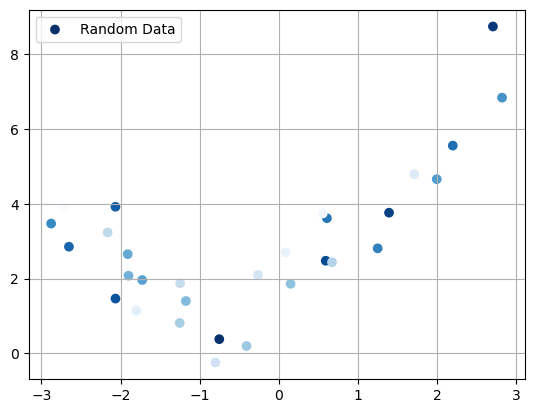

In [3]:
np.random.seed(42)

m = 30
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
colors = np.linspace(0, 1, num=30)

plt.scatter(X, y, c=colors, cmap='Blues_r')
plt.legend({'Random Data'})
plt.grid()
plt.show()

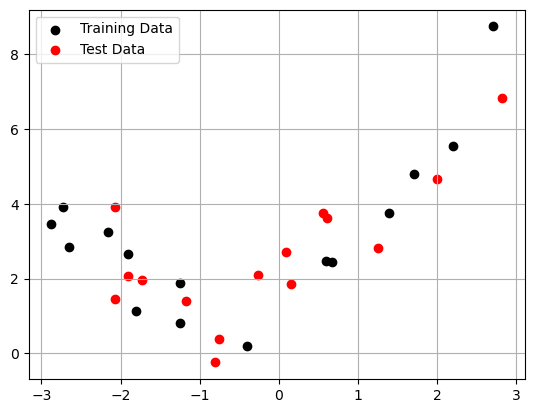

In [15]:
xTraining, xTest, yTraining, yTest = train_test_split(X, y, test_size=0.5, random_state=42)

plt.scatter(xTraining, yTraining, label='Training Data', c='black')
plt.scatter(xTest, yTest, label='Test Data', c='red')
ylims = plt.ylim()
plt.legend()
plt.grid()

In [16]:
usualPolyReg10 = Pipeline((
    ('poly_reg', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
)).fit(xTraining, yTraining)

ridgePolyReg10 = Pipeline((
    ('poly_reg', PolynomialFeatures(degree=10, include_bias=False)),
    ('ridge_reg', Ridge(alpha=1.0))
)).fit(xTraining, yTraining)

lassoPolyReg10 = Pipeline((
    ('poly_reg', PolynomialFeatures(degree=10, include_bias=False)),
    ('lasso_reg', Lasso(alpha=1.0))
)).fit(xTraining, yTraining)

elasticnetPolyReg10 = Pipeline((
    ('poly_reg', PolynomialFeatures(degree=10, include_bias=False)),
    ('elasticnet_reg', ElasticNet(alpha=1.0))
)).fit(xTraining, yTraining)

/home/lucas-renan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.351e+00, tolerance: 6.185e-03
  model = cd_fast.enet_coordinate_descent(
/home/lucas-renan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.388e+00, tolerance: 6.185e-03
  model = cd_fast.enet_coordinate_descent(


In [17]:
regList = [('Usual Regression', usualPolyReg10), ('Ridge Regression', ridgePolyReg10), ('Lasso Regression', lassoPolyReg10), ('Elastic Net Regression', elasticnetPolyReg10)]

In [18]:
for reg in regList:
    print('Regressão ', reg[0])
    print('Polinomio: %2.2f + %2.2f x + %2.2f x^2 + %2.2f x^3 + %2.2f x^4 + %2.2f x^5 + %2.2f x^6 + %2.2f x^7 + %2.2f x^8 + %2.2f x^9 + %2.2f x^10' % 
          (reg[1][1].intercept_, 
          reg[1][1].coef_.flatten()[0],
          reg[1][1].coef_.flatten()[1],
          reg[1][1].coef_.flatten()[2],
          reg[1][1].coef_.flatten()[3],
          reg[1][1].coef_.flatten()[4],
          reg[1][1].coef_.flatten()[5],
          reg[1][1].coef_.flatten()[6],
          reg[1][1].coef_.flatten()[7],
          reg[1][1].coef_.flatten()[8],
          reg[1][1].coef_.flatten()[9]))
    print('---')

Regressão  Usual Regression
Polinomio: 0.49 + 2.12 x + 3.39 x^2 + -1.88 x^3 + -2.54 x^4 + 0.99 x^5 + 0.96 x^6 + -0.21 x^7 + -0.15 x^8 + 0.01 x^9 + 0.01 x^10
---
Regressão  Ridge Regression
Polinomio: 1.45 + 0.69 x + 0.28 x^2 + 0.13 x^3 + 0.10 x^4 + 0.04 x^5 + 0.05 x^6 + -0.03 x^7 + -0.02 x^8 + 0.00 x^9 + 0.00 x^10
---
Regressão  Lasso Regression
Polinomio: 2.05 + 0.00 x + 0.00 x^2 + 0.00 x^3 + 0.00 x^4 + 0.04 x^5 + 0.03 x^6 + 0.00 x^7 + -0.00 x^8 + -0.00 x^9 + -0.00 x^10
---
Regressão  Elastic Net Regression
Polinomio: 2.00 + 0.00 x + 0.00 x^2 + 0.07 x^3 + 0.03 x^4 + 0.03 x^5 + 0.02 x^6 + 0.00 x^7 + -0.00 x^8 + -0.00 x^9 + -0.00 x^10
---


Usual Regression: RMSE = 0.377, MAE = 0.267
Ridge Regression: RMSE = 0.487, MAE = 0.371
Lasso Regression: RMSE = 0.881, MAE = 0.696
Elastic Net Regression: RMSE = 0.836, MAE = 0.668


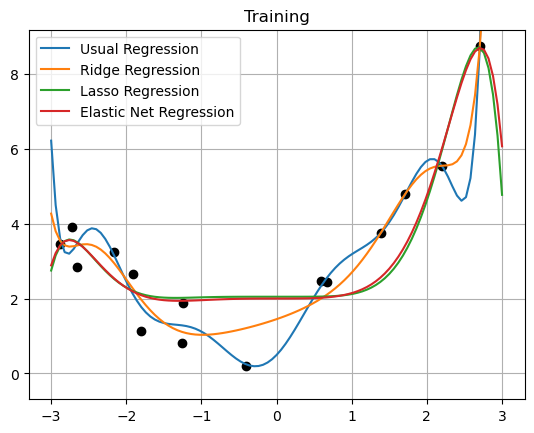

In [22]:
xPlot = np.linspace(-3, 3, num=101).reshape(101, 1)
plt.plot(xTraining, yTraining, color='black', marker='o', linestyle='')

for reg in regList:
    plt.plot(xPlot, reg[1].predict(xPlot), label=reg[0])
    yPred = reg[1].predict(xTraining)
    print(reg[0] + ': RMSE = %2.3f, MAE = %2.3f' % 
          (np.sqrt(mean_squared_error(yTraining, yPred)), mean_absolute_error(yTraining, yPred)))
    
plt.grid()
plt.legend()
plt.title('Training')
plt.ylim(ylims)
plt.show()

Usual Regression: RMSE = 2.975, MAE = 1.631
Ridge Regression: RMSE = 1.817, MAE = 1.202
Lasso Regression: RMSE = 1.138, MAE = 0.888
Elastic Net Regression: RMSE = 1.146, MAE = 0.889


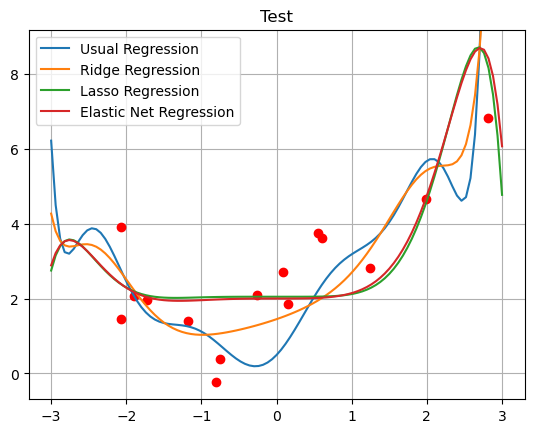

In [24]:
xPlot = np.linspace(-3, 3, num=101).reshape(101, 1)
plt.plot(xTest, yTest, color='red', marker='o', linestyle='')

for reg in regList:
    plt.plot(xPlot, reg[1].predict(xPlot), label=reg[0])
    yPred = reg[1].predict(xTest)
    print(reg[0] + ': RMSE = %2.3f, MAE = %2.3f' %
          (np.sqrt(mean_squared_error(yTest, yPred)), mean_absolute_error(yTest, yPred)))
    
plt.grid()
plt.legend()
plt.title('Test')
plt.ylim(ylims)
plt.show()